In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
from numpy import array
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
#tf.random.set_seed(7)
#tf.random.set_seed(77)

In [2]:
nc_f    = './icecon.APPX.Bering_Strait.nc'
#nc_f    = './icecon.APPX.90N.135W.nc'
nc_fid  = Dataset(nc_f, 'r')
time    = nc_fid.variables['record'][:]

In [3]:
#sic    = np.cos(time*np.pi)
sic    = np.round(np.square(np.round(np.cos(time*np.pi)*10))/10)*10

In [4]:
nmonth  = len(time)
sic_train       =  sic[0:nmonth-12]
time_train      = time[0:nmonth-12]

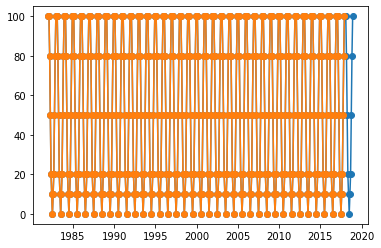

In [5]:
plt.plot(time,sic,'-o')
plt.plot(time_train,sic_train,'-o')

In [6]:
print(sic[nmonth-24:])

[100.0 100.0 80.0 50.0 20.0 10.0 0.0 10.0 20.0 50.0 80.0 100.0 100.0 100.0
 80.0 50.0 20.0 10.0 0.0 10.0 20.0 50.0 80.0 100.0]


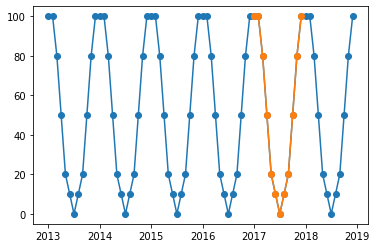

In [7]:
plt.plot(time[nmonth-72:],sic[nmonth-72:],'-o')
plt.plot(time_train[nmonth-24:nmonth-12],sic_train[nmonth-24:nmonth-12],'-o')

In [8]:
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                        break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return array(X), array(y)

In [9]:
EX1 = [10,20,30,40,50,60,70,80,90]

In [10]:
X, Y = split_sequence(EX1,4)
for i in range(len(X)):
    print(X[i], Y[i])

[10 20 30 40] 50
[20 30 40 50] 60
[30 40 50 60] 70
[40 50 60 70] 80
[50 60 70 80] 90


In [11]:
n_steps = 12
X_SIC, Y_SIC = split_sequence(sic_train,n_steps)
print(X_SIC.shape)

(420, 12)


In [12]:
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_SIC, Y_SIC, epochs=2000, verbose=0)

In [13]:
sic_new = np.zeros(n_steps)

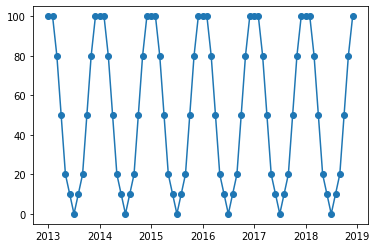

In [14]:
plt.plot(time[nmonth-72:],sic[nmonth-72:],'-o')

input:  [[100.0 100.0 80.0 50.0 20.0 10.0 0.0 10.0 20.0 50.0 80.0 100.0]]
press return to continue
sic            at  2018.0 is  100.0
sic prediction at  2018.0 is  99.99991607666016

press return to continue
input:  [[100.0 80.0 50.0 20.0 10.0 0.0 10.0 20.0 50.0 80.0 100.0 100.0]]
press return to continue
sic            at  2018.0833 is  100.0
sic prediction at  2018.0833 is  100.0002212524414

press return to continue
input:  [[80.0 50.0 20.0 10.0 0.0 10.0 20.0 50.0 80.0 100.0 100.0 100.0]]
press return to continue
sic            at  2018.1666 is  80.0
sic prediction at  2018.1666 is  80.0003890991211

press return to continue
input:  [[50.0 20.0 10.0 0.0 10.0 20.0 50.0 80.0 100.0 100.0 100.0 80.0]]
press return to continue
sic            at  2018.25 is  50.0
sic prediction at  2018.25 is  50.0003547668457

press return to continue
input:  [[20.0 10.0 0.0 10.0 20.0 50.0 80.0 100.0 100.0 100.0 80.0 50.0]]
press return to continue
sic            at  2018.3333 is  20.0
sic prediction at

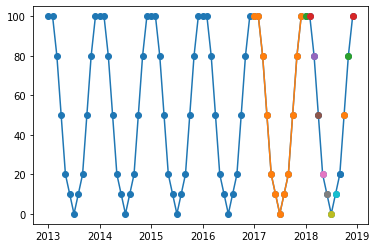

In [15]:
plt.plot(time[nmonth-72:],sic[nmonth-72:],'-o')
plt.plot(time_train[nmonth-24:nmonth-12],sic_train[nmonth-24:nmonth-12],'-o')
for i in range(n_steps):
        x_input = sic[nmonth-24+i:nmonth-12+i]
        #print(time[nmonth-24+i:nmonth-12+i])
        x_input = x_input.reshape((1, n_steps))
        
        print('input: ', x_input)
        input('press return to continue')
        sic_new[i] = model.predict(x_input, verbose=0)
        print('sic            at ', time[nmonth-12+i],'is ', sic[nmonth-12+i])
        print('sic prediction at ', time[nmonth-12+i],'is ', sic_new[i])
        print('')
        plt.plot(time[nmonth-12+i],sic_new[i],'-o')
        input('press return to continue')